# Geocoding

Geocoding is the computational process of transforming a physical address description to a location on the Earth’s surface (spatial representation in numerical coordinates)

Luckily, in Python there are nice libraries that makes the geocoding really easy. One of the libraries that can do the geocoding for us is geopy that makes it easy to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.

Geopy uses 3rd party geocoders
- http://resources.arcgis.com/en/help/arcgis-rest-api/
- http://developer.baidu.com/map/webservice-geocoding.htm
- http://www.microsoft.com/maps/developers/web.aspx
- http://geocoder.us/
- https://www.geocodefarm.com/
- http://www.geonames.org/
- https://developers.google.com/maps/documentation/geocoding/
- http://api.ign.fr/tech-docs-js/fr/developpeur/search.html
- http://www.mapquestapi.com/geocoding/
- https://mapzen.com/projects/search/
- http://navidata.pl/
- http://geocoder.opencagedata.com/api.html
- http://developer.mapquest.com/web/products/open/geocoding-service
- https://wiki.openstreetmap.org/wiki/Nominatim
- https://smartystreets.com/products/liveaddress-api
- http://what3words.com/api/reference
- http://api.yandex.com/maps/doc/intro/concepts/intro.xml

In [1]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
# Filepath
fp = r"data-address/addresses.txt"

# Read the data
data = pd.read_csv(fp, sep=';')

In [3]:
# Let's take a look of the data
data.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


In [4]:
# Import the geocoding tool
from geopandas.tools import geocode
from geopy.geocoders import Nominatim

In [5]:
# from geopy.extra.rate_limiter import RateLimiter
# from geopy.geocoders import Nominatim
# locator = Nominatim(user_agent="myApp")
# location = locator.geocode("Champ de Mars, Paris, France")
# type(location)
# df['location'] = df['ADDRESS'].apply(geocode)
# print(location.address)
# print(location.geocode)
# geocoder = RateLimiter(locator.geocode, min_delay_seconds=1)

In [6]:
# Geocode addresses with Nominatim backend
geo = geocode(data['addr'], provider='nominatim', user_agent="my-application", timeout=5)

In [7]:
geo.head(2)

,geometry,address
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns..."
1,POINT (24.93169 60.16902),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."


In [8]:
join = geo.join(data)

In [9]:
type(join)

geopandas.geodataframe.GeoDataFrame

In [10]:
# Output file path
outfp = r"./data-address/addresses.shp"

# Save to Shapefile
join.to_file(outfp)

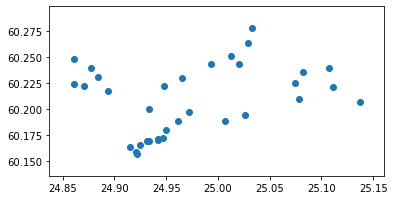

In [11]:
join.plot()